## Enquête : les étudiants et la ville

Nous considérons une partie des données issues de l'enquête "Les étudiants et la ville" effectuée en 2001 par des étudiants de sociologie à l'Université de Tours. Cet exemple est décrit dans : Crucianu M., Asselin de Beauville J-P., Boné
R., Méthodes factorielles pour l'analyse des données, Hermès-Lavoisier 2004.

__L'analyse porte sur cinq questions en rapport avec le logement étudiant. L'ensemble des individus statistiques est ici un échantillon de 383 étudiants.__

In [27]:
import pandas as pd
import numpy as np
from fanalysis.mca import MCA
import matplotlib.pyplot as plt

In [28]:
df = pd.read_table("data/ex_acm.txt", header=0, index_col=0)
df

Mode    Type     Ancien       Eloign     Superf
1       NR1   Autre        NR3  plus_5km_NR   plus_30m
2       NR1   Autre        NR3     de_1_5km        NR5
3       NR1   Autre        NR3  plus_5km_NR        NR5
4       NR1   Autre        NR3  plus_5km_NR        NR5
5       NR1   Autre        NR3  plus_5km_NR        NR5
..      ...     ...        ...          ...        ...
379    Seul  Appart        NR3  plus_5km_NR  de_10_20m
380  Couple   Autre  de_1_3ans     de_1_5km   plus_30m
381    Seul     NR2  plus_3ans  plus_5km_NR  moins_10m
382   Coloc     NR2  moins_1an     de_1_5km   plus_30m
383     NR1   Autre  de_1_3ans  plus_5km_NR        NR5

[383 rows x 5 columns]

In [29]:
for i in range(5):
    print(df.iloc[:,i].unique())

['NR1' 'Seul' 'Coloc' 'Couple']
['Autre' 'NR2' 'Studio' 'Cite' 'Chamb' 'Appart']
['NR3' 'moins_1an' 'de_1_3ans' 'plus_3ans']
['plus_5km_NR' 'de_1_5km' 'moins_1km']
['plus_30m' 'NR5' 'de_10_20m' 'moins_10m' 'de_20_30m']


<img src="data/des_data.jpg" width=500 height=500 />

In [30]:
X = df.values
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values)
my_mca.fit(X)

MCA(row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109,...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 37

In [31]:
print(my_mca.eig_)

[[7.21527891e-01 4.03288606e-01 3.28844287e-01 2.51904524e-01
  2.36094369e-01 2.10495696e-01 1.98499515e-01 1.86482543e-01
  1.70800409e-01 1.66764927e-01 1.23982984e-01 1.10424187e-01
  1.04249432e-01 7.46917156e-02 5.53192193e-02 3.84513821e-02
  1.81783147e-02]
 [2.12214086e+01 1.18614296e+01 9.67189078e+00 7.40895658e+00
  6.94395204e+00 6.19104988e+00 5.83822102e+00 5.48478067e+00
  5.02354146e+00 4.90485078e+00 3.64655834e+00 3.24777020e+00
  3.06615976e+00 2.19681516e+00 1.62703586e+00 1.13092300e+00
  5.34656315e-01]
 [2.12214086e+01 3.30828381e+01 4.27547289e+01 5.01636855e+01
  5.71076375e+01 6.32986874e+01 6.91369084e+01 7.46216891e+01
  7.96452306e+01 8.45500814e+01 8.81966397e+01 9.14444099e+01
  9.45105697e+01 9.67073848e+01 9.83344207e+01 9.94653437e+01
  1.00000000e+02]]


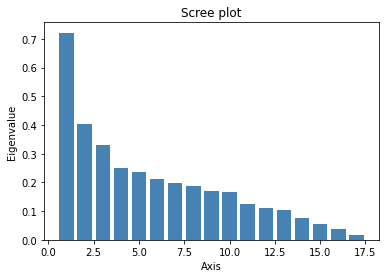

In [32]:
my_mca.plot_eigenvalues()

In [33]:
print("La moyenne des valeurs propres : \n", np.average(my_mca.eig_[0]))
print("La moyenne des valeurs propres est aussi égale à 1/p : \n", 1/5)
print("On retient donc 3 facteurs")

La moyenne des valeurs propres : 
 0.20000000000000007
La moyenne des valeurs propres est aussi égale à 1/p : 
 0.2
On retient donc 4 facteurs


In [37]:
#Instanciation
my_mca = MCA(row_labels=df.index.values, var_labels=df.columns.values[0:4],n_components=3)
#Calcul
my_mca.fit(X)

MCA(n_components=3,
    row_labels=array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 1...
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 

In [38]:
df_rows = my_mca.row_topandas()
print(df_rows)

     row_coord_dim1  row_coord_dim2  row_coord_dim3  row_contrib_dim1  \
1         -1.493799        0.007911       -0.049346          0.807482   
2         -1.529649       -0.425435        0.178491          0.846705   
3         -1.865093       -0.500662        0.280889          1.258778   
4         -1.865093       -0.500662        0.280889          1.258778   
5         -1.865093       -0.500662        0.280889          1.258778   
..              ...             ...             ...               ...   
379       -0.284472       -0.201026        0.217113          0.029284   
380       -0.257295        0.672886       -0.344194          0.023956   
381       -0.042455       -0.796109       -0.406274          0.000652   
382       -0.056545        0.140053       -0.404866          0.001157   
383       -1.390965       -0.400417        0.208550          0.700133   

     row_contrib_dim2  row_contrib_dim3  row_cos2_dim1  row_cos2_dim2  \
1            0.000041          0.001933       0.75

In [39]:
# Coordonnées des points lignes
print(my_mca.row_coord_)

[[-1.49379936  0.00791127 -0.04934614]
 [-1.52964938 -0.42543508  0.17849081]
 [-1.86509316 -0.50066206  0.28088948]
 ...
 [-0.04245452 -0.79610858 -0.40627416]
 [-0.05654538  0.14005282 -0.40486623]
 [-1.39096481 -0.40041699  0.2085497 ]]


In [40]:
# Contributions des points lignes
print(my_mca.row_contrib_)

[[8.07481606e-01 4.05208130e-05 1.93338072e-03]
 [8.46704546e-01 1.17179563e-01 2.52954633e-02]
 [1.25877806e+00 1.62283602e-01 6.26443440e-02]
 ...
 [6.52222853e-04 4.10326796e-01 1.31053714e-01]
 [1.15702417e-03 1.26989842e-02 1.30146959e-01]
 [7.00132742e-01 1.03803086e-01 3.45326622e-02]]


In [41]:
# Cos2 des points lignes
print(my_mca.row_cos2_)

[[7.52038469e-01 2.10934878e-05 8.20657569e-04]
 [5.59036822e-01 4.32437379e-02 7.61181700e-03]
 [7.48871052e-01 5.39629081e-02 1.69854447e-02]
 ...
 [2.71383191e-04 9.54288390e-02 2.48526924e-02]
 [5.51622980e-04 3.38401071e-03 2.82794605e-02]
 [4.14320687e-01 3.43343891e-02 9.31372623e-03]]
